# Fish Weight Prediction Using Random Forest Regression

In [1]:
#First, let us import the libraries that are intially required for visualization and analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab 
%matplotlib inline

In [2]:
# Now, lets read in the dataset that we will be using and also check the first 5 values.
df = pd.read_csv('Fish.csv')

In [3]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


As mentioned earlier, the column names of Length1, Length2 and Length3 will have to be changed to get a better clarity of what lengths they are referring to. This helps us to understand the features of the fish much better.

In [4]:
df.rename(columns={'Weight':'Weight in grams','Length1':'Vertical Length in cm','Length2':'Diagonal Length in cm',
                  'Length3':'Cross Length in cm','Height':'Height in cm','Width':'Diagonal Width in cm'},inplace = True)

In [5]:
df.head()

,Species,Weight in grams,Vertical Length in cm,Diagonal Length in cm,Cross Length in cm,Height in cm,Diagonal Width in cm
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [6]:
#Now, lets check some info of our dataset as to how many columns and rows are present and also if there are any nulll values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Species                159 non-null    object 
 1   Weight in grams        159 non-null    float64
 2   Vertical Length in cm  159 non-null    float64
 3   Diagonal Length in cm  159 non-null    float64
 4   Cross Length in cm     159 non-null    float64
 5   Height in cm           159 non-null    float64
 6   Diagonal Width in cm   159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [7]:
#Now we will check the statistical summary of our dataset.
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Weight in grams,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Vertical Length in cm,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Diagonal Length in cm,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Cross Length in cm,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height in cm,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Diagonal Width in cm,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


In [8]:
#Checking some information about the species
df['Species'].describe()

count       159
unique        7
top       Perch
freq         56
Name: Species, dtype: object

In [9]:
#It looks like the fish Perch is the one that is the most in our dataset
df['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [10]:
weight = df.groupby(['Species'])['Weight in grams']

In [11]:
weight.describe()

,count,mean,std,min,25%,50%,75%,max
Species,,,,,,,,
Bream,35.0,617.828571,209.205709,242.0,462.50,610.00,717.00,1000.0
Parkki,11.0,154.818182,78.755086,55.0,105.00,145.00,185.00,300.0
Perch,56.0,382.239286,347.617717,5.9,120.00,207.50,692.50,1100.0
Pike,17.0,718.705882,494.140765,200.0,345.00,510.00,950.00,1650.0
Roach,20.0,152.050000,88.828916,0.0,104.25,147.50,171.75,390.0
Smelt,14.0,11.178571,4.131526,6.7,8.95,9.85,12.20,19.9
Whitefish,6.0,531.000000,309.602972,270.0,279.00,423.00,735.00,1000.0


In [12]:
#Checking the correlation of each independant variable with respect to the dependant variable and also visualizing it
df.corr()['Weight in grams']

Weight in grams          1.000000
Vertical Length in cm    0.915712
Diagonal Length in cm    0.918618
Cross Length in cm       0.923044
Height in cm             0.724345
Diagonal Width in cm     0.886507
Name: Weight in grams, dtype: float64

<AxesSubplot:>

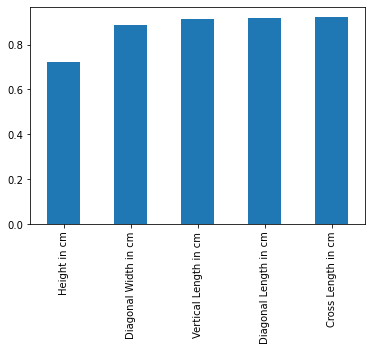

In [13]:
df.corr()['Weight in grams'].sort_values().drop('Weight in grams').plot(kind='bar')

# Data Visualization

In [14]:
sns.set_style('whitegrid')

<AxesSubplot:>

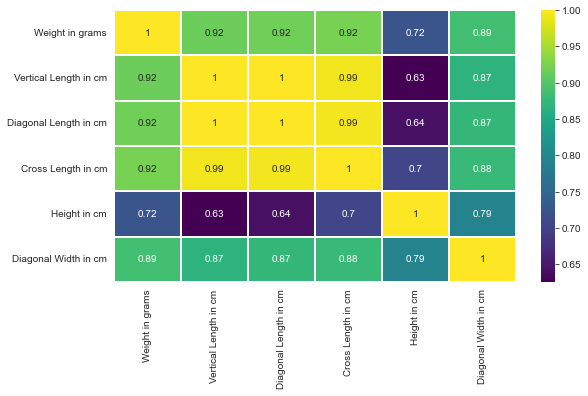

In [15]:
#Checking the correlation of all the columns to each other and also visualizing it using a heatmap
plt.figure(figsize=(9,5))
sns.heatmap(df.corr(),cmap='viridis',annot=True,linewidths=0.01)

<AxesSubplot:xlabel='Species', ylabel='count'>

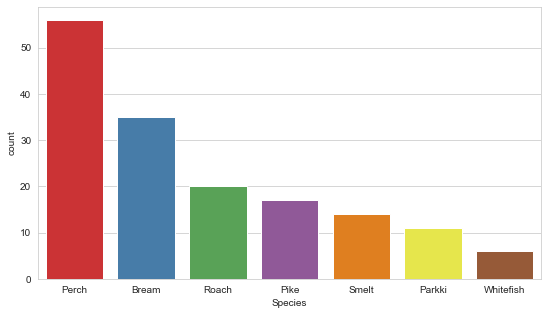

In [16]:
# Representing the number of each species of fish through seaborn's countplot
plt.figure(figsize=(9,5))
order_s = ['Perch','Bream','Roach','Pike','Smelt','Parkki','Whitefish']
sns.countplot(x='Species',data=df,palette='Set1',order=order_s)

<AxesSubplot:xlabel='Species', ylabel='Weight in grams'>

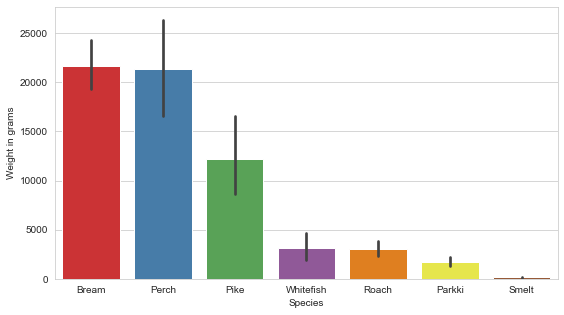

In [17]:
# Representing the total weight of each species of fish through seaborn's barplot
plt.figure(figsize=(9,5))
order_w = ['Bream','Perch','Pike','Whitefish','Roach','Parkki','Smelt']
sns.barplot(x='Species',y='Weight in grams',data=df,estimator=sum,palette='Set1',order=order_w)

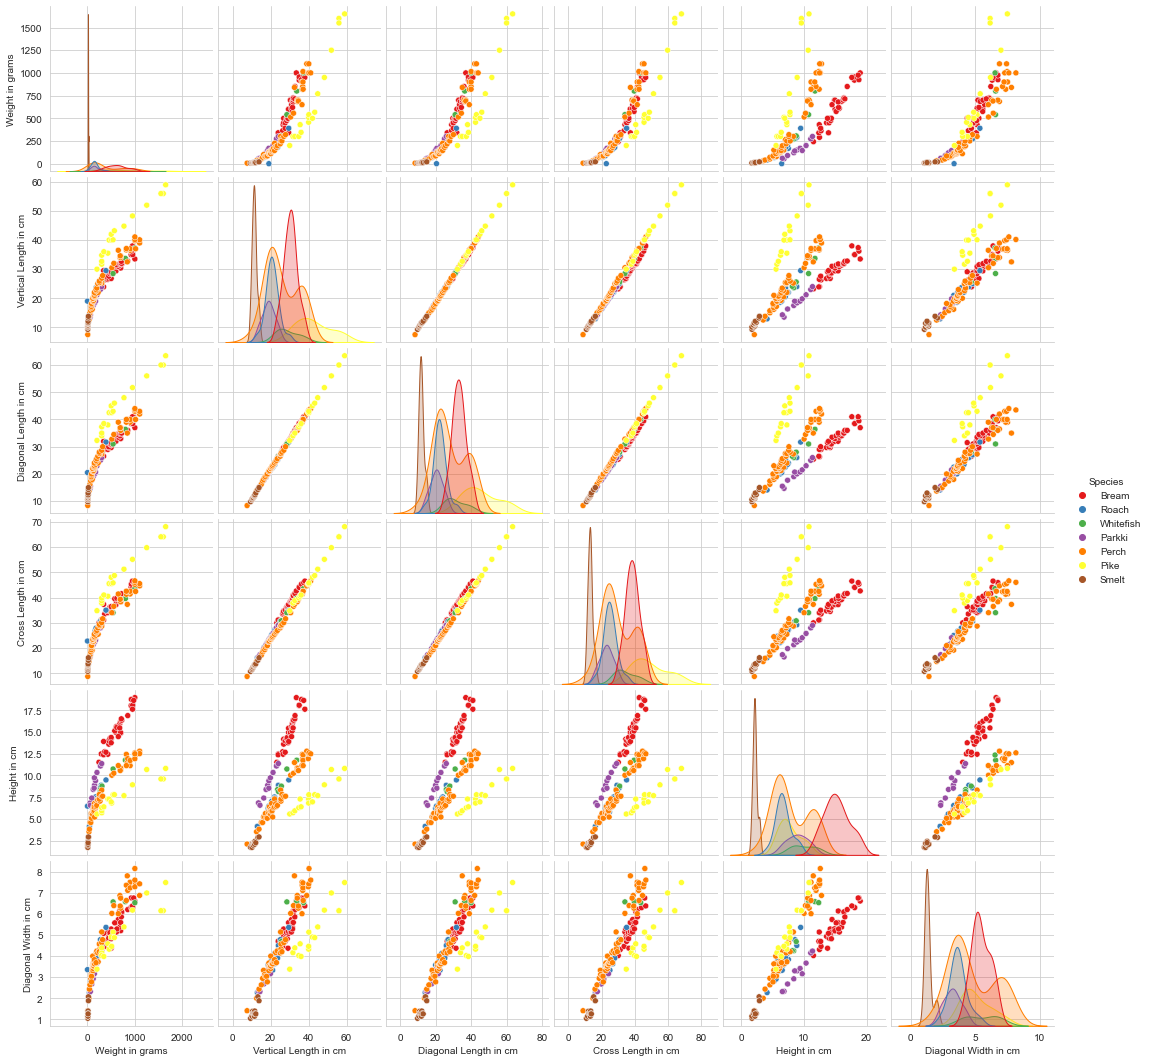

In [18]:
#Lets use seaborn's pairplot to check the pairwise relationship in the dataset with respect to Species.
sns.pairplot(df,hue='Species',palette='Set1')

c:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight in grams', ylabel='Density'>

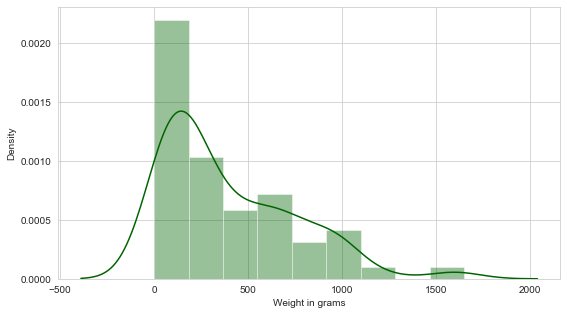

In [19]:
# Checking the distribution of weights of fish by using a distplot
plt.figure(figsize=(9,5))
sns.distplot(df['Weight in grams'],color='darkgreen')

<AxesSubplot:xlabel='Weight in grams'>

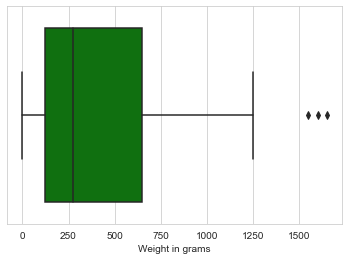

In [20]:
sns.boxplot(x=df['Weight in grams'],color='green')

In [21]:
#Detecting outliers and removing them
outlier = []
data = df['Weight in grams']
def detect_outlier(data):
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)

    for i in data:
        
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outlier.append(i)
    return outlier

In [22]:
detect_outlier(data)

[1600.0, 1550.0, 1650.0]

In [23]:
# It looks like weight above 1500 grams seem to be an outlier. These can be removed from the dataset.
df[df['Weight in grams'] > 1500][['Species','Weight in grams']]

,Species,Weight in grams
142,Pike,1600.0
143,Pike,1550.0
144,Pike,1650.0


In [24]:
df.drop([142,143,144],inplace=True)

Next, let us create dummy variables for the Species column as the model does not take Strings as an input. Later, we will drop the Species column and join both the dummies dataframe and our original dataset.

In [25]:
Species = pd.get_dummies(df['Species'],drop_first=True)

In [26]:
new_df  = pd.concat([df,Species],axis=1)

In [27]:
new_df.head()

,Species,Weight in grams,Vertical Length in cm,Diagonal Length in cm,Cross Length in cm,Height in cm,Diagonal Width in cm,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,0,0,0,0,0,0
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,0,0,0,0,0,0
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,0,0,0,0,0,0
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,0,0,0,0,0,0
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,0,0,0,0,0,0


In [28]:
new_df.drop('Species',inplace=True,axis=1)

In [29]:
new_df.head()

,Weight in grams,Vertical Length in cm,Diagonal Length in cm,Cross Length in cm,Height in cm,Diagonal Width in cm,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,0,0,0,0,0,0


## Training and Splitting the model into Training and Test sets

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = new_df.drop('Weight in grams',axis=1) #independant variables
y = new_df['Weight in grams'] #dependant variable/predictand

In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [33]:
train_rmse_error = []
test_rmse_error = []

for d in range(1,5):
    
    poly_converter = PolynomialFeatures(degree = d, include_bias = False)
    poly_features = poly_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse =  np.sqrt(mean_squared_error(y_test, test_pred))
    
    train_rmse_error.append(train_rmse)
    test_rmse_error.append(test_rmse)
    

In [34]:
train_rmse_error

[73.25469412562657,
 29.75292620051147,
 5.101864716815434e-09,
 1.3467236162812866e-09]

In [35]:
test_rmse_error

[83.05836258068862, 83.7482380635985, 3434.064458526272, 3845.83034821382]

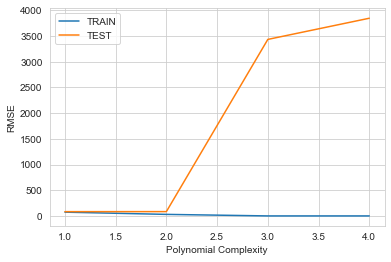

In [36]:
plt.plot(range(1,5),train_rmse_error[:4],label='TRAIN')
plt.plot(range(1,5),test_rmse_error[:4],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

In [37]:
final_poly_converter = PolynomialFeatures(degree = 2, include_bias = False)
poly_final_features = final_poly_converter.fit_transform(X)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(poly_final_features, y, test_size=0.3, random_state=101)

In [39]:
model_final = LinearRegression()

In [40]:
sca = StandardScaler()
X_train = sca.fit_transform(X_train)
X_test = sca.transform(X_test)

In [41]:
model_final = LinearRegression()

In [42]:
model_final.fit(X_train,y_train)

LinearRegression()

In [43]:
pred = model_final.predict(X_test)

In [44]:
np.sqrt(mean_squared_error(y_test, pred))

83.7482380635985